In [1]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter 

circ = Circuit(2)
circ.H(0)
circ.CX(0,1)
circ.measure_all()

render_circuit_jupyter(circ)

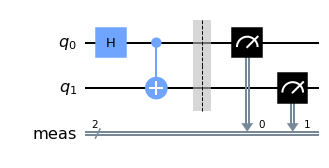

In [2]:
# build a qiskit circuit
from qiskit import QuantumCircuit

qiskit_circ = QuantumCircuit(2)
qiskit_circ.h(0)
qiskit_circ.cx(0,1)
qiskit_circ.measure_all()
qiskit_circ.draw('mpl')

In [3]:
# Convert qiskit circuit to a TKET circuit
from pytket.extensions.qiskit import qiskit_to_tk
tk_circ = qiskit_to_tk(qiskit_circ)

render_circuit_jupyter(tk_circ)

In [4]:
from pytket.qasm import circuit_from_qasm
from pytket import OpType

qpe2_circ = circuit_from_qasm('qpe2.qasm') # Phase estimation circuit with 2 measurement qubits
print('Gate count = ', qpe2_circ.n_gates) # lets count the gates in our circuit
print('Two qubit gate count = ',qpe2_circ.n_gates_of_type(OpType.CU1) + qpe2_circ.n_gates_of_type(OpType.SWAP))
render_circuit_jupyter(qpe2_circ)

Gate count =  12
Two qubit gate count =  5


In [5]:
# lets add an extra qubit and demonstrate some circuit compilation
qpe3_circ = circuit_from_qasm('qpe3.qasm')
print('Gate count = ', qpe3_circ.n_gates) # lets count the gates in our circuit
print('Two qubit gate count = ', qpe3_circ.n_gates_of_type(OpType.CU1) + qpe3_circ.n_gates_of_type(OpType.SWAP))
render_circuit_jupyter(qpe3_circ)

Gate count =  21
Two qubit gate count =  11


In [6]:
from pytket.extensions.quantinuum import QuantinuumBackend

backend = QuantinuumBackend('H1-1E') # emulator

In [7]:
gate_set = backend.backend_info.gate_set
print(gate_set)

Enter your Quantinuum email: callum.macpherson@cambridgequantum.com
Enter your Quantinuum password: ········
{<OpType.ZZMax: 65>, <OpType.Rz: 33>, <OpType.Barrier: 6>, <OpType.SetBits: 13>, <OpType.RangePredicate: 15>, <OpType.ExplicitPredicate: 16>, <OpType.ExplicitModifier: 17>, <OpType.MultiBit: 18>, <OpType.Measure: 58>, <OpType.Reset: 60>, <OpType.PhasedX: 63>}


In [8]:
compiled_circ = backend.get_compiled_circuit(qpe3_circ)
render_circuit_jupyter(compiled_circ)

print('Gate count = ' , compiled_circ.n_gates)
print('Two qubit gate count (ZZMax) = ' , compiled_circ.n_gates_of_type(OpType.ZZMax))

Gate count =  101
Two qubit gate count (ZZMax) =  23


In [9]:
qpe3_circ = circuit_from_qasm('qpe3.qasm')
backend.default_compilation_pass(optimisation_level = 2).apply(qpe3_circ)

render_circuit_jupyter(qpe3_circ)
print('Gate count = ' , qpe3_circ.n_gates)
print('Two qubit gate count (ZZMax) = ' ,qpe3_circ.n_gates_of_type(OpType.ZZMax))

Gate count =  49
Two qubit gate count (ZZMax) =  11


In [20]:
from pytket.extensions.quantinuum import QuantinuumBackend

backend = QuantinuumBackend('H1-1E') # emulator

In [21]:
from pytket.extensions.qiskit import IBMQEmulatorBackend

backend = IBMQEmulatorBackend('ibmq_belem', hub ='partner-cqc', group ='internal', project ='default')

/Users/callum/Desktop/presentations/pres-env/lib/python3.8/site-packages/qiskit/providers/aer/noise/device/models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (171330.39907604994 > 2 * 70871.61349679707). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
/Users/callum/Desktop/presentations/pres-env/lib/python3.8/site-packages/qiskit/providers/aer/noise/device/models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (171330.39907604994 > 2 * 70871.61349679707). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
/Users/callum/Desktop/presentations/pres-env/lib/python3.8/site-packages/qiskit/providers/aer/noise/device/models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maxim

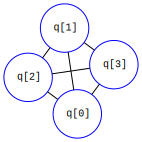

In [22]:
from pytket.utils import Graph

qpe3_circ = circuit_from_qasm('qpe3.qasm')
Graph(qpe3_circ).get_qubit_graph()

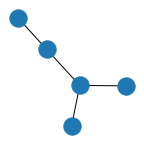

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(backend.backend_info.architecture.coupling)
plt.figure(figsize=(1.8,1.8))
nx.draw(G)
plt.show() # This is how the qubits are laid out on the device

In [24]:
compiled_circ = backend.get_compiled_circuit(qpe3_circ)
render_circuit_jupyter(compiled_circ)

print('Gate count = ' , compiled_circ.n_gates)
print('Two qubit gate count = ' , compiled_circ.n_gates_of_type(OpType.CX))

Gate count =  71
Two qubit gate count =  35


In [25]:
qpe3_circ = circuit_from_qasm('qpe3.qasm')
backend.default_compilation_pass(optimisation_level = 2).apply(qpe3_circ)

render_circuit_jupyter(qpe3_circ)
print('Gate count = ' , qpe3_circ.n_gates)
print('Two qubit gate count (CX) = ' ,qpe3_circ.n_gates_of_type(OpType.CX))

Gate count =  58
Two qubit gate count (CX) =  17


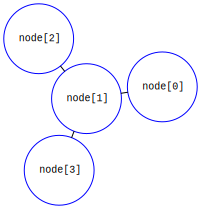

In [26]:
Graph(qpe3_circ).get_qubit_graph()

In [27]:
from pytket.passes import FullPeepholeOptimise

qpe3_circ = circuit_from_qasm('qpe3.qasm')

FullPeepholeOptimise().apply(qpe3_circ)

render_circuit_jupyter(qpe3_circ)
print('Gate count = ' , qpe3_circ.n_gates)
print('Two qubit gate count (CX) = ' ,qpe3_circ.n_gates_of_type(OpType.CX))

Gate count =  31
Two qubit gate count (CX) =  11


In [28]:
from pytket.passes import auto_rebase_pass

#Define a rebase to the IBM gateset with auto_rebase_pass
ibm_rebase = auto_rebase_pass({OpType.X,OpType.SX,OpType.Rz,OpType.CX})

qpe3_circ = circuit_from_qasm('qpe3.qasm')
ibm_rebase.apply(qpe3_circ)
render_circuit_jupyter(qpe3_circ)

In [29]:
from pytket.passes import SequencePass

custom_sequence = SequencePass([FullPeepholeOptimise(allow_swaps = False), ibm_rebase])

custom_sequence.apply(qpe3_circ)
render_circuit_jupyter(qpe3_circ)
print('Gate count = ' , qpe3_circ.n_gates)
print('Two qubit gate count (CX) = ' ,qpe3_circ.n_gates_of_type(OpType.CX))

Gate count =  104
Two qubit gate count (CX) =  14
